In [436]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [437]:
# importing data frame
concrete = pd.read_csv('concrete.csv')

concrete.drop('Unnamed: 0', axis=1, inplace=True)

concrete.head()

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CompressiveStrength  
0          676.0   28                79.99  
1          676.0   28                61.89  
2          594.0  270                40.27  
3          594.0  365                41.05  
4          825.5  360                44.30

In [438]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [439]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [440]:
X = sm.add_constant(X)

In [441]:
model = sm.OLS(y,X).fit()

In [442]:
predictions = model.predict(X)

In [443]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.613    
Dependent Variable: CompressiveStrength AIC:                7755.9240
Date:               2020-12-29 13:47    BIC:                7800.3598
No. Observations:   1030                Log-Likelihood:     -3869.0  
Df Model:           8                   F-statistic:        204.3    
Df Residuals:       1021                Prob (F-statistic): 6.29e-206
R-squared:          0.616               Scale:              108.14   
---------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
---------------------------------------------------------------------
const               -23.3312  26.5855 -0.8776 0.3804 -75.4997 28.8373
Cement                0.1198   0.0085 14.1129 0.0000   0.1031  0.1365
BlastFurnaceSlag      0.1039   0.0101 10.2474 0.0000   0.0840  0.1238
FlyAsh                0.0879   0.0126  6.9882 0.0000   0.0632  0.1126
Water                -0.1499   0.0402 -3.7314 0.0002  -0.2288 -0.0711
Superplasticizer      0.2922   0.0934  3.1279 0.0018   0.1089  0.4755
CoarseAggregate       0.0181   0.0094  1.9257 0.0544  -0.0003  0.0365
FineAggregate         0.0202   0.0107  1.8867 0.0595  -0.0008  0.0412
Age                   0.1142   0.0054 21.0464 0.0000   0.1036  0.1249
---------------------------------------------------------------------
Omnibus:                5.378         Durbin-Watson:           1.282 
Prob(Omnibus):          0.068         Jarque-Bera (JB):        5.304 
Skew:                   -0.174        Prob(JB):                0.071 
Kurtosis:               3.045         Condition No.:           106075
=====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [444]:
# Adjusted R Square : R Square tends to increase even if the additional input do not add any value to the model. Adjusted R ßquare compensates for it. 
# R Square measures the proportion of variability explained by feautre on the target. 

# R Square = 1 - (SSE/SST)
# Adjusted R Square = 1 - [(1-Rsquare)(n-1)/(n-k-1)]

# n : number of samples
# k : number of features

# Adj. R Sqaure pf 0.613 means 61 % of variatios in the increase in compresive strength is explained by the features used in the model

In [445]:
# AIC and BIC will be used when we have different models to compare.

# AIC determines the relative informational value of the model using the maximum likelihood estimation and number of features
# AIC = 2k - 2ln(L) where k is the number of features and L is the maximum likelihood estimation
# For a number of different model, AIC with the lowest value will be chosen as the best model

# BIC similar as AIC but based on Bayesian estimates. Similarly the lowest value be chosen.

In [446]:
# Std. Error of the variable measures how much uncertainity is asscoaited with each variable. Lower the better.
# t stat is coefficient / std. error. Cememnt stands 14 std. deviation from Zero. 
# p >|t| means the p value of each variable and how significant are these variables
# [0.025 0.975] : The range for confidence for each variable. For example in case of "age" , we are 95% confident that a one year increase in age 
# will correspond to 0.1026 and 0.1249 increase in compressive strength, while keeping other factors constant

In [447]:
# we can see from the above model that "Fine Aggregate" and "Coarse Aggregate" has p value much higher and 95% confidennce has 0 in the range. 
# Let's remove these two feature and run the model again to see if we improved.

In [448]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']
X = sm.add_constant(X)

In [449]:
model = sm.OLS(y,X).fit()

In [450]:
predictions = model.predict(X)

In [451]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-29 13:47    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                28.9930   4.2132   6.8815 0.0000 20.7255 37.2605
Cement                0.1054   0.0042  24.8248 0.0000  0.0971  0.1137
BlastFurnaceSlag      0.0865   0.0050  17.3854 0.0000  0.0767  0.0962
FlyAsh                0.0687   0.0077   8.8766 0.0000  0.0535  0.0838
Water                -0.2181   0.0211 -10.3215 0.0000 -0.2596 -0.1766
Superplasticizer      0.2403   0.0846   2.8417 0.0046  0.0744  0.4063
Age                   0.1135   0.0054  20.9880 0.0000  0.1029  0.1241
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            4662 
=====================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [452]:
# The new model's Adjusted R Square is still same at 61 % so no improvements.
# The coefficient for "Cemenrt" is 0.1054 with 95% CI between 0.0971 and 0.1137 it means that with one unit increase in cement , the Compressive Strength increase by 0.1054
# Also the 95 % CI tells that if we repeat this procedure numerous times, around 95 % probablity that caluclated CI from some future experiments encompasses the value of cement coefficient 
# between 0.09 and 0.11

In [453]:
# SST : Sum of Square Total : Sum of Squared difference between the observed dependent variable and its mean of dependent variable
# SSR : Sum of Square due to Regression : Sum of the squared difference between the predicated value and mean of the dependent variable
# SSE : Sum of Square Error : Sum of squared between the observed value and the predicted value
# SST = SSE + SSR

In [454]:
concrete.head()

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CompressiveStrength  
0          676.0   28                79.99  
1          676.0   28                61.89  
2          594.0  270                40.27  
3          594.0  365                41.05  
4          825.5  360                44.30

In [455]:
# Let's see if we can improve model performance by "feature scaling" the features.

# Some machine learning models are more prne to get impacted through different scales for features. Examples are regression and neural network

# KNN, K Means and SVM uses distance between points to determine similarity hence they might also get impacted. 


# There are two main types of feature scaling 

# Normalization : Converts between 0 to 1. Also known as min max scaling.

# x norm = (x-min(x))/ (max(x)-min(x))

# Standardization : Converts values towards centered around mean with a unit standard deviation . Mean becomes zero 
# and resulting distribution has a unit standard deviation

# x` = (x-mu)/(sigma)

# mu is the mean and sigma is the standard deviation



In [456]:
# importing sklearn preprocessing to do min max scaling

from sklearn.preprocessing import MinMaxScaler

In [457]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']

In [458]:
min_max_scaler = MinMaxScaler()

In [459]:
X = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns=X.columns,index=X.index)


In [460]:
X = sm.add_constant(X)

In [461]:
model = sm.OLS(y,X).fit()

In [462]:
predictions = model.predict(X)

In [463]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-29 13:47    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
const              13.2955   1.8359   7.2419 0.0000   9.6929  16.8981
Cement             46.1711   1.8599  24.8248 0.0000  42.5215  49.8207
BlastFurnaceSlag   31.0779   1.7876  17.3854 0.0000  27.5701  34.5856
FlyAsh             13.7389   1.5478   8.8766 0.0000  10.7018  16.7761
Water             -27.3047   2.6454 -10.3215 0.0000 -32.4957 -22.1136
Superplasticizer    7.7380   2.7231   2.8417 0.0046   2.3946  13.0814
Age                41.3110   1.9683  20.9880 0.0000  37.4486  45.1735
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            14   
=====================================================================

"""

In [464]:
# As you can see there is no improvement in the model with "feature scaling"
# Probably we have features that we do not need. Although we did earlier by looking at p value. 
# Let's also make it work through some cool methods available to us through sklearn

In [465]:
# Feature Selection is done to get the following benefits.

# Curse of dimensionality : In this model , we have just 10 features but in many real life problesm we may have 100s if not 1000s of variables.
# Feature selection helps to remove the curse of dimensionality

# Overfitting reduction : Since we will not have multi-collinearity hence reduction in overfitting

# Accuracy : Model accuracy improves since less misleading data

In [466]:
from sklearn.feature_selection import SelectKBest, f_regression

In [467]:
test = SelectKBest(score_func=f_regression,k=5)

In [468]:
np.seterr(divide='ignore',invalid='ignore')
X_selected = test.fit(X,y)

In [469]:
cols = X_selected.get_support(indices=True)

In [470]:
new_feature = X.columns[cols]

In [471]:
new_feature

Index(['Cement', 'BlastFurnaceSlag', 'Water', 'Superplasticizer', 'Age'], dtype='object')

In [472]:
X.columns

Index(['const', 'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water',
       'Superplasticizer', 'Age'],
      dtype='object')

In [473]:
# we can see that flyash has been removed as the feature. However we have used here the K as 5. What if k is not 5 and something else

In [474]:
# RFE : Recursive Feature Eliminition

In [475]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

In [476]:
model = LinearRegression()

In [477]:
rfe = RFE(estimator=model,n_features_to_select=5)

In [478]:
fit = rfe.fit(X,y)

In [479]:
cols = fit.get_support(indices=True)

In [480]:
new_feature = X.columns[cols]

In [481]:
new_feature

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Age'], dtype='object')

In [482]:
# based on RFE it seems that FlyAsh is better predictor

In [483]:
# let's use the grid search to identify number of good predictors

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

In [484]:
kbest_estimators = SelectKBest(f_regression)

pipeline = Pipeline([('kbest', kbest_estimators),('linear',LinearRegression())])

In [485]:
grid_search = GridSearchCV(pipeline,{'kbest__k':[1,2,3,4,5,6,7]})

In [486]:
grid_search.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('kbest',
                                        SelectKBest(score_func=<function f_regression at 0x7facc2470310>)),
                                       ('linear', LinearRegression())]),
             param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7]})

In [487]:
grid_search.best_estimator_

Pipeline(steps=[('kbest',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7facc2470310>)),
                ('linear', LinearRegression())])

In [488]:
grid_search.best_params_

{'kbest__k': 7}

In [489]:
features = pipeline.named_steps['kbest']

In [490]:
# seems like the more number of feature you give the more it selects

In [491]:
# let's use one more technique to identify the feature importance

from sklearn.ensemble import ExtraTreesRegressor

In [492]:
model = ExtraTreesRegressor(n_estimators=100)

model.fit(X,y)

ExtraTreesRegressor()

In [493]:
model.feature_importances_

array([0.        , 0.27880421, 0.11048233, 0.04480973, 0.10227585,
       0.09837643, 0.36525145])

In [494]:
feats = {}

for feature, importance in zip(X.columns,model.feature_importances_):
    feats[feature] = importance


In [495]:
importance = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'Pearson Relative importance'})

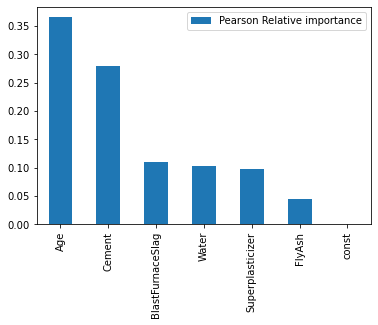

In [496]:
importance.sort_values(by='Pearson Relative importance',ascending=False).plot(kind='bar');

In [497]:
# let's also use RFECV to understand if we need all features

estimator = LinearRegression()

selector = RFECV(estimator,step=1,cv=5)

selector = selector.fit(X,y)

In [498]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [499]:
# seems like all of them got selected . Disapponting

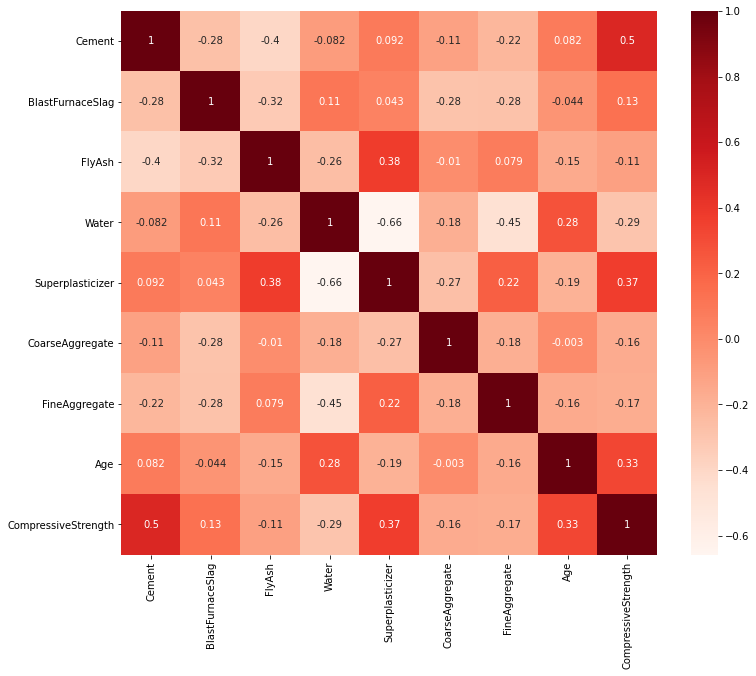

In [500]:
# let's see if we can use Pearson Correlation to understand the importance

plt.figure(figsize=(12,10))

cor = concrete.corr()

sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)

plt.show()

In [501]:
# As we can see the highest correlation of compressive strength is with Cement on positive side and 
# Water on negative side

In [502]:
cor_target = abs(cor["CompressiveStrength"])

relevant_features = cor_target[cor_target>0.1]

In [503]:
relevant_features.sort_values(ascending=False)

CompressiveStrength    1.000000
Cement                 0.497832
Superplasticizer       0.366079
Age                    0.328873
Water                  0.289633
FineAggregate          0.167241
CoarseAggregate        0.164935
BlastFurnaceSlag       0.134829
FlyAsh                 0.105755
Name: CompressiveStrength, dtype: float64

In [504]:
from sklearn.linear_model import LassoCV, Lasso

In [505]:
from sklearn.feature_selection import SelectFromModel

In [506]:
selection = SelectFromModel(LinearRegression())

selection.fit(X,y)

SelectFromModel(estimator=LinearRegression())

In [507]:
selected_features = X.columns[(selection.get_support())]

In [508]:
selected_features

Index(['Cement', 'BlastFurnaceSlag', 'Water', 'Age'], dtype='object')

In [509]:
# Seems like only 3 of these guys got selected

In [510]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'Age']]
y = concrete['CompressiveStrength']

X = sm.add_constant(X)

In [511]:
model = sm.OLS(y,X).fit()

In [512]:
print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.413    
Dependent Variable: CompressiveStrength AIC:                8178.0129
Date:               2020-12-29 13:47    BIC:                8197.7621
No. Observations:   1030                Log-Likelihood:     -4085.0  
Df Model:           3                   F-statistic:        242.7    
Df Residuals:       1026                Prob (F-statistic): 5.25e-119
R-squared:          0.415               Scale:              163.70   
----------------------------------------------------------------------
                     Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                2.9212    1.3402   2.1796  0.0295  0.2913  5.5510
Cement               0.0889    0.0040  22.3444  0.0000  0.0811  0.0968
BlastFurnaceSlag     0.0583    0.0048  12.1202  0.0000  0.0489  0.0677
Age                  0.0784    0.

In [513]:
# However when we run the model , its R Sqaure is much less than previously build model

In [514]:
# Let's look at residuals of the model

from statsmodels.stats.outliers_influence import OLSInfluence

In [515]:
influence = OLSInfluence(model)

In [516]:
influence.cooks_distance

(0       0.008034
 1       0.000853
 2       0.010619
 3       0.035012
 4       0.006470
           ...   
 1025    0.000120
 1026    0.000019
 1027    0.000032
 1028    0.000035
 1029    0.000006
 Length: 1030, dtype: float64,
 array([0.99987202, 0.99999855, 0.99977724, ..., 1.        , 1.        ,
        1.        ]))

In [517]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [518]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [519]:
X = sm.add_constant(X)

In [520]:
model = sm.OLS(y,X).fit()

In [521]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CompressiveStrength   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.613
Method:                  Least Squares   F-statistic:                     204.3
Date:                 Tue, 29 Dec 2020   Prob (F-statistic):          6.29e-206
Time:                         13:47:05   Log-Likelihood:                -3869.0
No. Observations:                 1030   AIC:                             7756.
Df Residuals:                     1021   BIC:                             7800.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312   

In [522]:
#  Cement is statistically signifcant predictor (at the 0.05 level) , relative to a model with all other predictors includd

In [523]:
# with one unit change in Cement , the compressive strneght will increase by 0.12 holding the other predictor fixed

# Regression assumptions

In [524]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [525]:
# Linearity : There is a linear relationship between features and target

<AxesSubplot:xlabel='CompressiveStrength', ylabel='Cement'>

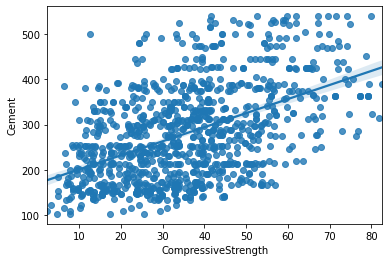

In [526]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Cement'])

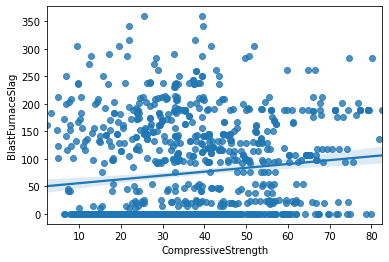

In [527]:
sns.regplot(x=concrete['CompressiveStrength'], y=concrete['BlastFurnaceSlag']);

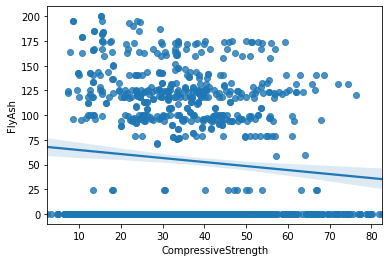

In [528]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['FlyAsh']);


<AxesSubplot:xlabel='CompressiveStrength', ylabel='Water'>

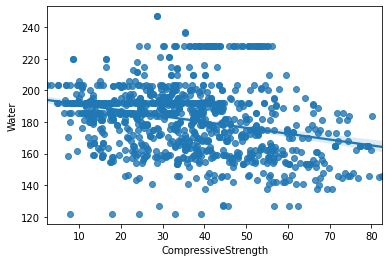

In [529]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Water'])

In [530]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

<AxesSubplot:xlabel='CompressiveStrength', ylabel='Superplasticizer'>

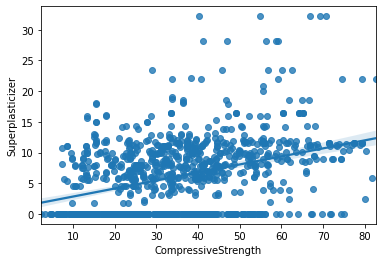

In [531]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Superplasticizer'])

<AxesSubplot:xlabel='CompressiveStrength', ylabel='CoarseAggregate'>

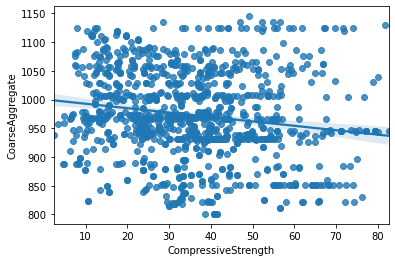

In [532]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['CoarseAggregate'])

<AxesSubplot:xlabel='CompressiveStrength', ylabel='FineAggregate'>

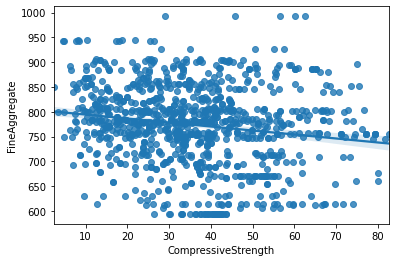

In [533]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['FineAggregate'])

<AxesSubplot:xlabel='CompressiveStrength', ylabel='Age'>

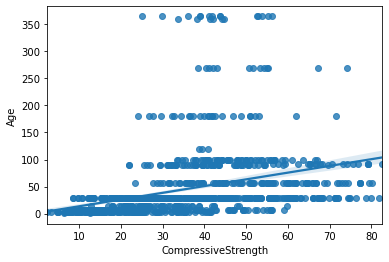

In [534]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Age'])

In [535]:
# Multicolinearity : The feature should not be correlated. If they will be then it will give raise to high variance and thus poor performance

In [536]:
concrete_without_CS = concrete.drop('CompressiveStrength',1)

corr = np.corrcoef(concrete_without_CS,rowvar=0) # correlation matrix

w, v = np.linalg.eig(corr) # eigen values and eigen vectors

In [537]:
print(w)

[2.28009936 0.03004278 0.17784169 1.4160748  1.34007903 0.79019547
 0.95150799 1.01415887]


In [538]:
# Residual should be normal with mean of 0

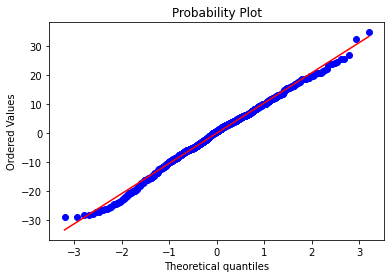

In [539]:
import pylab
import scipy.stats as stats
stats.probplot(y-predictions,dist='norm',plot=pylab);

In [540]:
# Heterodeskacity : Unequal variance in the error terms. By plotting predicted value vs the residuals. 

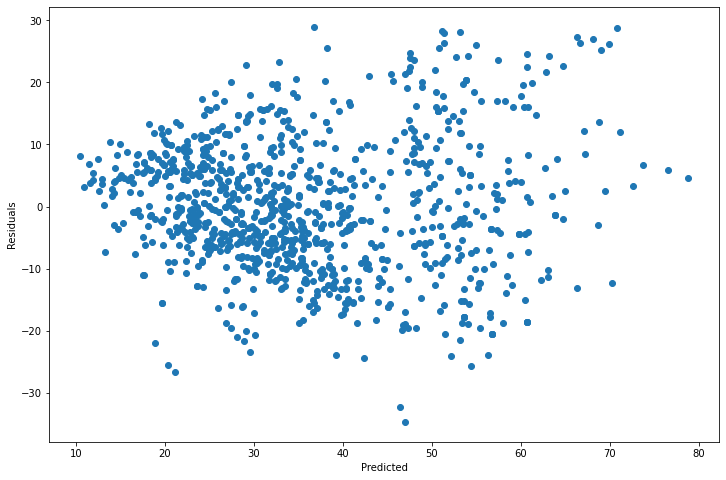

In [541]:
plt.figure(figsize=(12,8))
plt.plot(predictions,predictions-y,'o');
plt.xlabel(r'Predicted')
plt.ylabel(r'Residuals')
plt.show()

# Now with sklearn

In [545]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [547]:
concrete.describe().T

count        mean         std     min      25%      50%  \
Cement               1030.0  281.167864  104.506364  102.00  192.375  272.900   
BlastFurnaceSlag     1030.0   73.895825   86.279342    0.00    0.000   22.000   
FlyAsh               1030.0   54.188350   63.997004    0.00    0.000    0.000   
Water                1030.0  181.567282   21.354219  121.80  164.900  185.000   
Superplasticizer     1030.0    6.204660    5.973841    0.00    0.000    6.400   
CoarseAggregate      1030.0  972.918932   77.753954  801.00  932.000  968.000   
FineAggregate        1030.0  773.580485   80.175980  594.00  730.950  779.500   
Age                  1030.0   45.662136   63.169912    1.00    7.000   28.000   
CompressiveStrength  1030.0   35.817961   16.705742    2.33   23.710   34.445   

                          75%     max  
Cement                350.000   540.0  
BlastFurnaceSlag      142.950   359.4  
FlyAsh                118.300   200.1  
Water                 192.000   247.0  
Superplasticizer       10.200    32.2  
CoarseAggregate      1029.400  1145.0  
FineAggregate         824.000   992.6  
Age                    56.000   365.0  
CompressiveStrength    46.135    82.6

In [549]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate','FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [550]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

In [551]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [552]:
coefficient = pd.DataFrame(regressor.coef_, X.columns,columns=['Coeff'])

In [553]:
coefficient

Coeff
Cement            0.117865
BlastFurnaceSlag  0.104820
FlyAsh            0.087833
Water            -0.138134
Superplasticizer  0.321962
CoarseAggregate   0.021421
FineAggregate     0.024220
Age               0.111384

In [557]:
# For the model with statsmodel
model.params

const              -23.331214
Cement               0.119804
BlastFurnaceSlag     0.103866
FlyAsh               0.087934
Water               -0.149918
Superplasticizer     0.292225
CoarseAggregate      0.018086
FineAggregate        0.020190
Age                  0.114222
dtype: float64

In [558]:
y_pred = regressor.predict(X_test)

In [561]:
# Get the actual and predicted
df_regressor_true_predict = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [566]:
df_regressor_true_predict['residual'] = df_regressor_true_predict['Predicted'] - df_regressor_true_predict['Actual']

In [567]:
# evaluating the metrics

# Mean Absolute Error : Absolute difference between the predictions and actual
# Mean Squared Error : Squared of MAE
# Root Mean Sqaured Error : Sqaured and then root of error (prediction - actual). Gives more weight to large error.



In [573]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [574]:
print('Mean Absolute Error: ' ,mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :' , np.sqrt(mean_squared_error(y_test,y_pred)))
print('R Sqaure :', r2_score(y_test,y_pred))

Mean Absolute Error:  8.263245579835447
Mean Squared Error :  102.44693368341548
Root Mean Squared Error : 10.121607267791784
R Sqaure : 0.6743574328849791


In [575]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CompressiveStrength   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.613
Method:                  Least Squares   F-statistic:                     204.3
Date:                 Tue, 29 Dec 2020   Prob (F-statistic):          6.29e-206
Time:                         14:08:19   Log-Likelihood:                -3869.0
No. Observations:                 1030   AIC:                             7756.
Df Residuals:                     1021   BIC:                             7800.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312   

In [576]:
# We got lower R Square in statsmodel then sklearn

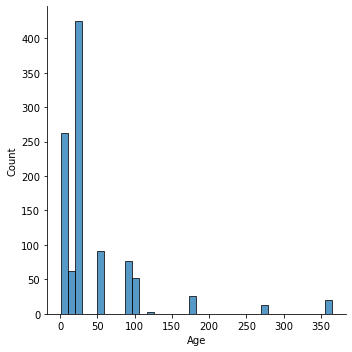

In [577]:
sns.displot(concrete['Age'])

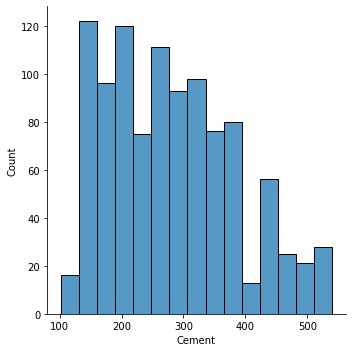

In [578]:
sns.displot(concrete['Cement'])

In [579]:
# We will make categorical variable from the Age and Cement

In [684]:
# bin label for age into 4 parts
bin_label_age = ['First','Second','Third','Fourth']
concrete['AGE_LEVELS'] = pd.qcut(concrete['Age'],q=4,labels=bin_label_age)

In [685]:
# bin label for cement into 4 parts
bin_label_cement = ['First','Second','Third','Fourth']
concrete['CEMENT_LEVELS'] = pd.qcut(concrete['Cement'],q=4,labels=bin_label_cement)

In [686]:
concrete.head()

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CompressiveStrength AGE_LEVELS CEMENT_LEVELS  
0          676.0   28                79.99     Second        Fourth  
1          676.0   28                61.89     Second        Fourth  
2          594.0  270                40.27     Fourth         Third  
3          594.0  365                41.05     Fourth         Third  
4          825.5  360                44.30     Fourth        Second

In [687]:
# Preprocessing data with following

# Missing values : Imputing numerical values with mean and categorical values with mode


In [688]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Cement               1030 non-null   float64 
 1   BlastFurnaceSlag     1030 non-null   float64 
 2   FlyAsh               1030 non-null   float64 
 3   Water                1030 non-null   float64 
 4   Superplasticizer     1030 non-null   float64 
 5   CoarseAggregate      1030 non-null   float64 
 6   FineAggregate        1030 non-null   float64 
 7   Age                  1030 non-null   int64   
 8   CompressiveStrength  1030 non-null   float64 
 9   AGE_LEVELS           1030 non-null   category
 10  CEMENT_LEVELS        1030 non-null   category
dtypes: category(2), float64(8), int64(1)
memory usage: 74.9 KB


In [689]:
X = concrete.drop('CompressiveStrength',1)
y = concrete['CompressiveStrength']

numeric_features = X.select_dtypes(include=['float64','int64']).columns
categorical_features = X.select_dtypes(include=['category','object']).columns

In [690]:
numeric_features, categorical_features

(Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
        'CoarseAggregate', 'FineAggregate', 'Age'],
       dtype='object'),
 Index(['AGE_LEVELS', 'CEMENT_LEVELS'], dtype='object'))

In [691]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [692]:
numerics_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
                transformers=[
                    ('num',numerics_transformer,numeric_features)
                ]
)

In [693]:
clf = Pipeline(steps=[('preprocces',preprocessor),('linear_regression',LinearRegression())])

In [694]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

In [695]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocces',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object'))])),
                ('linear_regression', LinearRegression())])

In [696]:
y_pred = clf.predict(X_test)

In [697]:
print("Mean Absolute Error :", mean_absolute_error(y_test,y_pred))
print("Root Mean Sqaure Error :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R Sqaure Value :", r2_score(y_test,y_pred))

Mean Absolute Error : 8.263245579835447
Root Mean Sqaure Error : 10.121607267791784
R Sqaure Value : 0.6743574328849791


In [698]:
# Still no improvement

In [699]:
# Let's see if we can improve it with categor polynomial feature

In [700]:
from sklearn.preprocessing import PolynomialFeatures

In [701]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly',PolynomialFeatures(degree=2))
])

categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('imputer',SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
                    transformers=[('num',numeric_transformer,numeric_features),
                                  ('cat',categorical_transformer,categorical_features)]

)

In [702]:
clf = Pipeline(steps=[('preprocess',preprocessor),('linear_regression',LinearRegression())])

In [703]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                            

In [704]:
y_pred = clf.predict(X_test)

In [705]:
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Sqaure Error :', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R Squre', r2_score(y_test,y_pred))

Mean absolute error:  5.06310915740221
Root Mean Sqaure Error : 6.570683354358339
R Squre 0.8627655067222337


In [668]:
# Much better improvement

In [707]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaling', StandardScaler()),
    ('poly',PolynomialFeatures(degree=3,interaction_only=True))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy="most_frequent"))
])

In [708]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

In [709]:
clf = Pipeline(steps=[('pre',preprocessor),('linear',LinearRegression())])

In [710]:
clf.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      interaction_only=True))]),
                                                  Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')),
                                                 ('cat',
                                 

In [711]:
y_pred = clf.predict(X_test)

In [714]:
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred))
print('Root Mean Sqaure Error :', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R Sqaure :', r2_score(y_test,y_pred))

Mean Absolute Error : 4.517213288834951
Root Mean Sqaure Error : 5.962514722301044
R Sqaure : 0.8869940958645499
